<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/SVM_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

A support vector machine (SVM) is a supervised learning algorithm that can be applied for both classification and regression projects. The algorithm is centered on getting a hyperplane that best divides the data into two groups. A kernelized support vector classifier is an SVM that employs a kernel function to represent the data in a higher-dimensional area, wherever it is simpler to get a split hyperplane. The main idea behind the SVM algorithm is to find a hyperplane that best separates the data into two classes. This can be useful in instances where the data is not linearly separate in the initial area. 

A kernelized support vector classifier would be advantageous for someone who is working with data that is not linearly discrete. This could be data that come in from various resources or data that has been changed in a certain way. 

The kernel function permits the data to be mapped into a higher-dimensional area, where it is simpler to find a split hyperplane. 

For instance, the SVM algorithm can be applied to classify images of handwritten digits into two classes: 0-9 or 9-0. The algorithm can as well be employed to categorize images of animals into two classes: cats and dogs. The SVM algorithm is valuable for everyone who requires categorizing data into two groups. The algorithm is also helpful for anyone who demands to discover a hyperplane that best divides the records into two classes.

## **How is it utilized in a real-world situation and who would find it advantageous?**
One real-world situation where a kernelized SVM might be applied is in image classification, where the data is frequently not linearly separate. **SVMs** have been discovered to be very effective in this task. A new scenario where **SVMs** might be employed is in detecting fraud or anomalies in financial information. Overall, SVMs can be valuable in any classification task where the information is not linearly separable. They are also successful in tasks where there is a lot of data or where the data is high-dimensional. 

The objective of the SVM algorithm is to produce the finest line or outcome edge that be able to separate n-dimensional space into groups so that we can simply put the new data point in the exact category in the time to come. This most excellent decision border is known as a hyperplane.


# **Data set Information**

## Data set Name Letter Image Recognition Data




###   -- P. W. Frey and D. J. Slate (Machine Learning Vol 6 No.2 March 91):		
## Letter Recognition Using Holland-style Adaptive Classifiers.	
		
###The study for this section examined the capability of various modifications of Holland-style adaptive classifier methods to understand to accurately estimate the letter classifications linked with vectors of 16 integer characteristics obtained from raster scan images of the letters. The greatest accuracy achieved was slightly over 80%.  It would be remarkable to see exactly how well other techniques do with the same data.	

##Pertinent Evidence:

##The purpose is to recognize each of the various black-and-white quadrangular pixels shown as one of the 26 capital letters in the English alphabet.  

##The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to generate a folder of 20,000 unique stimuli.  

##Each stimulus was transformed into 16 rude mathematical characteristics (statistical moments and edge counts) which were then cleared to fit into a variety of numeral values from 0 through 15.  

##We usually train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.  	

##Number of Instances: **20.000**

## Number of Attributes: 17 (Letter category and 16 numeric features)



 Attribute Information:						
	
1.  letter -	capital letter	-   (26 values from A to Z)	
2.  x-box	 -  horizontal position of box	 -  (integer)
3.  y-box	 -  vertical position of the box -  (integer)		
4.  width	 -  width of box			           -  (integer)
5.  high 	 -  heights of box			         -  (integer)
6.	onpix	 -  total # on pixels			       -  (integer)	
7.	x-bar	 -  mean x of on pixels in the box 	(integer)		
8.	y-bar	 -  mean y of on pixels in box	 -  (integer)		
9.	x2bar	 -  mean x variance		           -  (integer)
10.	y2bar	 -  mean y variance		           -  (integer)
11.	xybar	 -  mean x y correlation		     -  (integer)	
12.	x2ybr	 -  mean of x * x * y		         -  (integer)	
13.	xy2br	 -  mean of x * y * y		         -  (integer)	
14.	x-ege	 -  mean edge count left to right-	(integer)		
15.	xegvy	 -  correlation of x-ege with y  -	(integer)		
16.	y-ege	 -  mean edge count bottom to top-  (integer)		
17.	yegvx	 -  correlation of y-ege with x  -	(integer)		


	
 

Missing Attribute Values: None				
				
Class Distribution:

 	789 A	   766 B     736 C     805 D     768 E   775 F   773 G
 	734 H	   755 I     747 J     739 K     761 L   792 M   783 N
 	753 O	   803 P     783 Q     758 R     748 S   796 T   813 U
 	764 V	   752 W     787 X     786 Y     734 Z		



##**Data Understanding**
###Let's first understand the shape, attributes etc. of the dataset.

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

##**Importing the Dataset Letter Recognition**

In [ ]:
mydata = pd.read_csv('/content/letter-recognition.csv')

mydata.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Dimensions

In [ ]:
print("Dimensions: ", mydata.shape, "\n")

Dimensions:  (20000, 17) 



##Data types

In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


## # Generates descriptive statistics


In [ ]:
 mydata.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


### **There are 20000 Instances.**

### **The average value is y box is 7** 

### **The average value is x box is 4** 

### **The width and Heigh is average of 5**

### **The standard deviation is unusually large, the max value is 15.**

## histograms
## dataset.hist()
## plt.show()

In [ ]:
array = mydata.values

X = array[:, 1:17]
Y = array[:, 0]

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)

X matrix dimensionality: (20000, 16)
Y vector dimensionality: (20000,)


# Cleaning dataset

### Remove an unusual problem: the column labels that have a space, e.g. 'xbox ', which throws an error when indexed

In [ ]:
print(mydata.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


# Rename the columns

In [ ]:
mydata.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
print(mydata.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


##Order the column "letter" 

In [ ]:
order = list(np.sort(mydata['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#**Data Visualization and Analysis**


## Plot: Just how do different elements differ with the letters

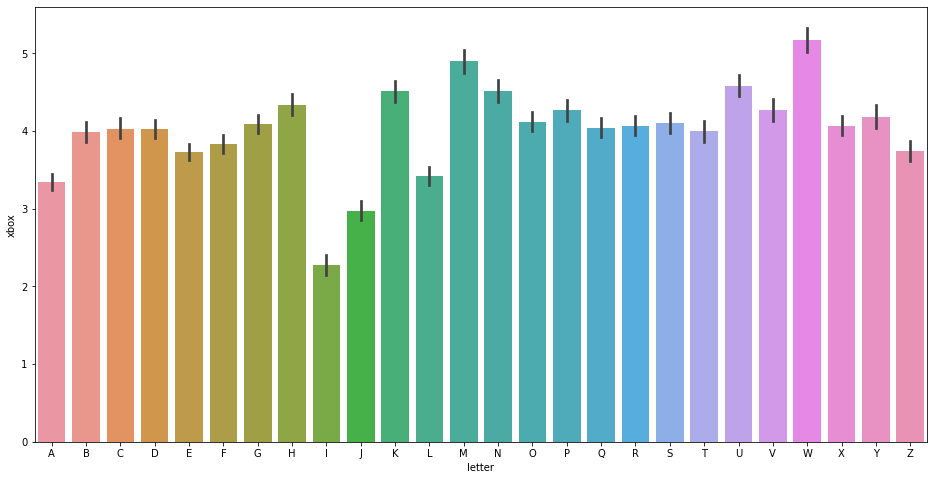

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='xbox', 
            data=mydata, 
            order=order)

##KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous

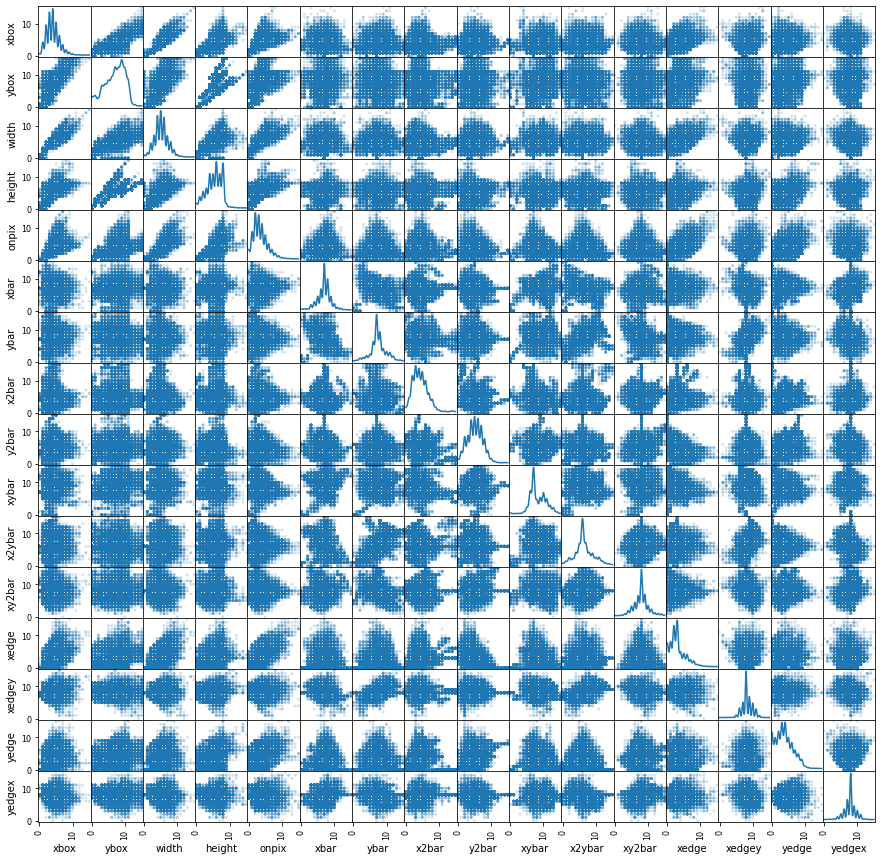

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(mydata, alpha=0.2, figsize=(15,15), diagonal= 'kde' )
plt.show()

##PLots

Text(0.5, 1.0, 'xbox v/s ybox')

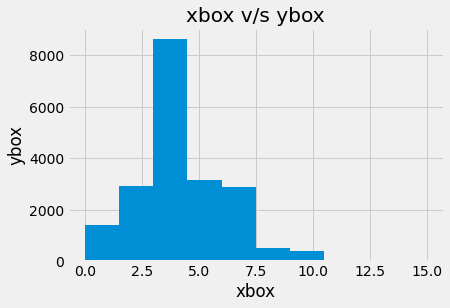

In [ ]:
plt.style.use('fivethirtyeight')
mydata['xbox'].hist()
plt.xlabel('xbox')
plt.ylabel('ybox')
plt.title('xbox v/s ybox')

Text(0.5, 1.0, 'ybox v/s xbox')

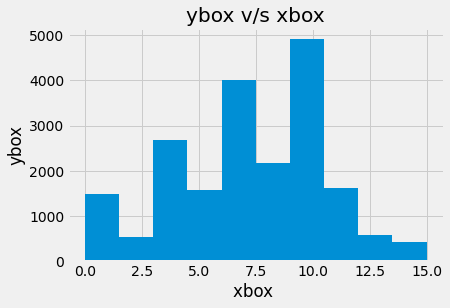

In [ ]:
plt.style.use('fivethirtyeight')
mydata['ybox'].hist()
plt.xlabel('xbox' ' ' )
plt.ylabel('ybox')
plt.title('ybox v/s xbox')

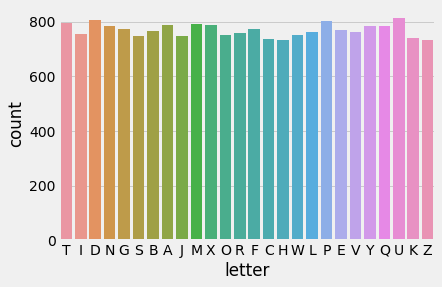

In [ ]:
sns.countplot(x='letter',data=mydata)

##The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


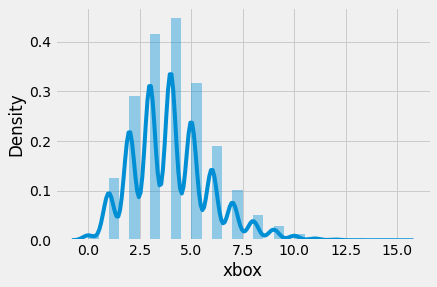

In [ ]:
sns.distplot(mydata['xbox'],kde=True,bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


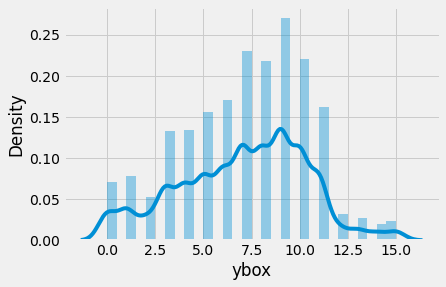

In [ ]:
sns.distplot(mydata['ybox'],kde=True,bins=30)

##Grouping By Letter

In [ ]:
mydata_means = mydata.groupby('letter').mean()
mydata_means.head(27)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510
F,3.832258,7.009032,4.898065,5.209032,3.178065,4.913548,10.454194,3.476129,4.886452,11.242581,7.830968,5.723871,1.736774,9.117419,3.321290,6.712258
G,4.086675,6.988357,4.988357,5.282018,3.566624,6.866753,6.586028,5.966365,5.337646,7.429495,6.157827,9.586028,2.833118,8.369987,5.146184,9.216041
H,4.331063,6.844687,5.784741,5.193460,4.253406,7.344687,7.320163,6.702997,4.280654,8.044959,5.899183,7.801090,3.862398,8.047684,3.095368,7.858311
I,2.270199,6.980132,2.631788,5.209272,1.825166,7.458278,7.035762,1.940397,5.973510,9.476821,5.797351,7.649007,0.537748,8.066225,2.141722,7.931126


##Observing Correlation between features of the Dataset

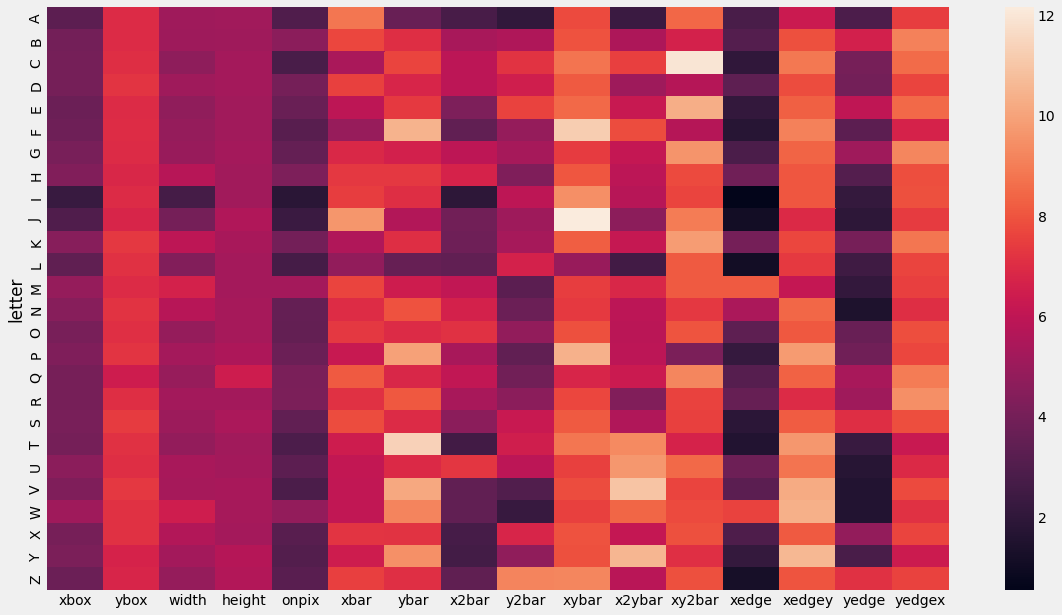

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(mydata_means)

## check distribution of letter column


In [ ]:
mydata['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

# Data Preparation

##Let's do some data preparation stages prior to modeling. Initially, let's see if it is vital to rescale the features, since they may have varying ranges. For example, here are the average values:

In [ ]:
round(mydata.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

**In this specific dataset, the mean values do not fluctuate a lot (e.g. getting a diff of an sort of scale). However, it is good to rescale them.**

## Splitting into X and y

In [ ]:
X = mydata.drop("letter", axis = 1)
y = mydata['letter']

## Scaling the features

In [ ]:
X_scaled = scale(X)

# split the data into a training set and a test set


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20,
                                                                                random_state=101)

##Model Building

To compare the accuracies is necesary build a linear and non-linear model with default huperparameters

## * Linear model

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

## predict

In [ ]:
y_pred = model_linear.predict(X_test)

## Confusion matrix and accuracy

### Accuracy

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

accuracy: 0.8555 



##Confusion matrix 

In [ ]:
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

[[128   0   0   1   0   0   0   0   0   1   0   1   0   0   0   0   0   2
    0   0   0   0   0   0   3   0]
 [  0 126   0   0   0   1   3   2   0   0   1   0   0   1   0   0   0   4
    3   0   0   1   0   1   0   0]
 [  0   0 139   0   7   0   6   1   0   0   3   0   0   0   2   0   0   0
    0   0   1   0   0   0   0   0]
 [  1   4   0 145   0   0   0   0   0   0   0   0   0   2   2   0   1   3
    1   0   0   0   0   0   0   0]
 [  0   0   2   0 129   1   6   0   0   0   0   3   0   0   0   0   2   2
    0   2   0   0   0   1   0   2]
 [  0   0   0   1   0 127   0   2   1   0   0   0   0   2   0   2   0   0
    1   5   0   0   0   0   1   0]
 [  0   0   8   5   2   2 110   0   0   0   4   1   2   0   0   1   3   0
    5   0   0   3   2   0   0   0]
 [  1   4   2   6   0   3   3 100   0   0   4   2   2   0   5   0   5   9
    0   0   3   2   0   2   1   0]
 [  0   0   0   3   0   4   0   0 121   7   0   0   0   0   0   0   0   0
    2   0   0   0   0   3   0   1]
 [  1   0   0   3  

##**The linear model gives approx. 85% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.**

## *Non-linear model
## using rbf kernel, C=1, default value of gamma


# Model

In [ ]:
non_linear_model = SVC(kernel='rbf')

## fit

In [ ]:
non_linear_model.fit(X_train, Y_train)

SVC()

## Predict

In [ ]:
y_pred = non_linear_model.predict(X_test)

# confusion matrix and accuracy

# accuracy


In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

accuracy: 0.94225 




# Confusion Matrix

In [ ]:
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

[[134   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2   0]
 [  0 135   0   1   1   0   1   0   0   0   0   0   0   0   0   0   0   3
    1   0   0   0   0   1   0   0]
 [  0   0 147   0   4   0   5   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 157   0   0   0   1   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 140   1   7   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 139   0   0   1   0   0   0   0   1   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   1   3   1   1 137   0   0   0   0   0   1   0   1   0   0   0
    0   0   0   1   2   0   0   0]
 [  0   4   1   4   0   0   3 125   0   0   2   1   1   0   1   0   3   9
    0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0 132   5   0   0   0   0   0   1   0   0
    0   0   0   0   0   1   0   0]
 [  1   0   0   1  

###**The non-linear model gives approx. 94% accuracy,  Consequently, getting further, let's select hyperparameters related to non-linear models.**

#Grid Search: Hyperparameter Tuning

##Let's now adjust the model to discover the best potential estimates of C and gamma equivalent to an RBF kernel. We'll use 5-fold cross validation.


## Now apply a KFold object with 5 splits 

In [ ]:
olds = KFold(n_splits = 5, shuffle = True, random_state = 101)


### specify range of hyperparameters
### Set the parameters by cross-validation


In [ ]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

## specify model


In [ ]:
model = SVC(kernel="rbf")


## set up GridSearchCV()


In [ ]:
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv=None,
                        verbose = 1,
                        return_train_score=True)      

# fit the model


In [ ]:
model_cv.fit(X_train,Y_train)     

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

##cv results

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.785578,0.226218,3.180657,0.034921,1,0.01,"{'C': 1, 'gamma': 0.01}",0.837500,0.845000,0.847500,...,0.842625,0.003455,7,0.850859,0.849453,0.852266,0.848047,0.850313,0.850187,0.001408
1,10.385583,0.433259,4.530426,0.877488,1,0.001,"{'C': 1, 'gamma': 0.001}",0.688438,0.703750,0.693750,...,0.692688,0.005958,10,0.696562,0.694844,0.694375,0.696797,0.692813,0.695078,0.001472
2,20.606509,0.637274,4.266061,0.015239,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.252812,0.259375,0.256875,...,0.252375,0.007051,12,0.253906,0.252969,0.257578,0.250859,0.253984,0.253859,0.002174
3,2.568461,0.017281,2.505778,0.618308,10,0.01,"{'C': 10, 'gamma': 0.01}",0.907500,0.918125,0.918125,...,0.915438,0.004523,3,0.932422,0.930781,0.931484,0.932031,0.930547,0.931453,0.000714
4,4.565449,0.020045,3.261429,0.130491,10,0.001,"{'C': 10, 'gamma': 0.001}",0.810000,0.816562,0.822500,...,0.816938,0.004318,8,0.823516,0.825313,0.825469,0.825156,0.821875,0.824266,0.001387
5,10.848270,1.023666,4.418554,0.756788,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.689063,0.703125,0.693438,...,0.692250,0.005937,11,0.696328,0.693750,0.694141,0.696172,0.692578,0.694594,0.001448
6,3.203855,1.149812,2.150205,0.768344,100,0.01,"{'C': 100, 'gamma': 0.01}",0.942813,0.949688,0.951875,...,0.949875,0.004087,2,0.977656,0.980000,0.980078,0.979688,0.978359,0.979156,0.000973
7,2.942312,0.024187,2.424327,0.276312,100,0.001,"{'C': 100, 'gamma': 0.001}",0.861250,0.870938,0.866250,...,0.865187,0.003489,5,0.879687,0.878437,0.878047,0.878828,0.878672,0.878734,0.000544
8,4.630923,0.038060,3.195104,0.009204,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.804063,0.809375,0.818750,...,0.811500,0.005083,9,0.817969,0.819766,0.818516,0.818828,0.817656,0.818547,0.000734
9,2.819562,0.016759,1.414819,0.010645,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.956562,0.950625,0.954688,...,0.954937,0.002819,1,0.997812,0.997266,0.997109,0.997031,0.996953,0.997234,0.000307


## converting C to numeric type for plotting on x-axis


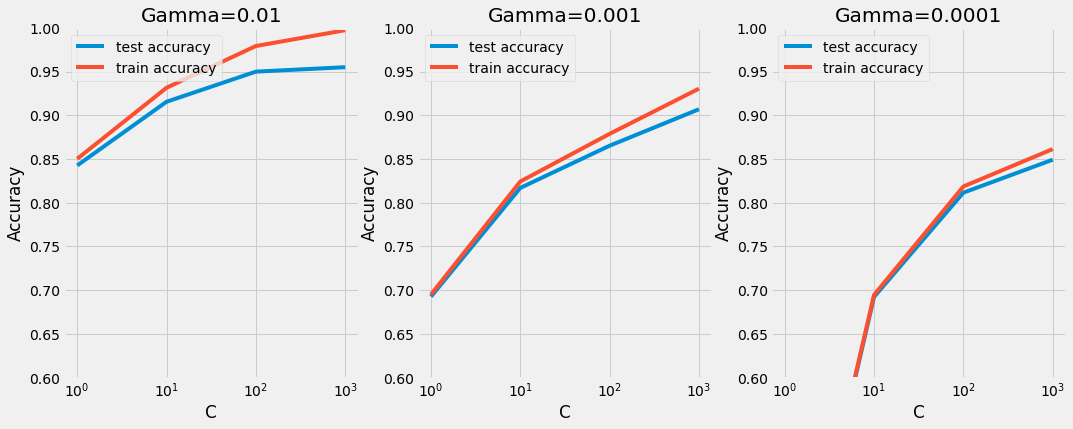

In [ ]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


##The plots show some valuable understandings:
##•	Non-linear models (high gamma) work considerably safer than the linear ones
##•	At every value of gamma, a high value of C takes the lead to good quality execution
## •	No one of the models tends to overfit (still the complicated ones), because the training and test precisions directly understand every other
## This indicates that the difficulty and the information is intrinsically non-linear in kind, and a complicated model will do better than easy, linear models in this instance.
## Now we can select the finest hyperparameters.

##printing the optimal accuracy score and hyperparameters

In [ ]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

#Building and Evaluating the Final Model
##Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

### model with optimal hyperparameters

In [ ]:
# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(Y_test, y_pred), "\n")
print(metrics.confusion_matrix(Y_test, y_pred), "\n")

accuracy 0.96125 

[[134   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 140   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   1   0   0   0   0]
 [  0   0 155   0   2   0   1   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   1   0 154   0   0   1   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 144   1   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 137   0   0   1   1   0   0   0   0   0   3   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   3   1   0 138   1   0   0   0   0   1   0   1   0   0   0
    0   0   0   1   1   0   0   0]
 [  0   2   3   4   0   0   1 134   1   1   3   0   1   0   0   0   4   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0 134   5   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]


# **Conclusion**
##The precision accomplished by utilizing a non-linear kernel (96% Aprox. ) is much greater than that of a linear one (85% Aprox.). We can determine that the trouble is extremely non-linear in nature.
**bold texbold